In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
file_name = '2_robot_pos'
df = pd.read_csv(f'data/2_robot_pos.csv', skiprows=3)
df

,frame,time,robot_id,x,y,velocity_x,velocity_y,speed,has_collided
0,0,0.0000,0,0.000000,-0.00000,0.000000,0.000000,0.000000,-1
1,0,0.0000,1,0.000000,-0.22500,0.000000,0.000000,0.000000,-1
2,0,0.0000,2,0.000000,-0.45000,0.000000,0.000000,0.000000,-1
3,0,0.0000,3,0.000000,-0.67500,0.000000,0.000000,0.000000,-1
4,0,0.0000,4,0.000000,-0.90000,0.000000,0.000000,0.000000,-1
...,...,...,...,...,...,...,...,...,...
2400,480,16.0001,0,-0.046741,-6.00025,0.837569,-0.049439,0.839027,-1
2401,480,16.0001,1,0.096028,-6.19901,-0.745769,-0.007153,0.745803,-1
2402,480,16.0001,2,0.078216,-6.46292,-0.394312,0.082785,0.402908,-1
2403,480,16.0001,3,-0.016466,-6.63143,-0.223166,0.435054,0.488953,-1


In [8]:
num_robots = df['robot_id'].max() + 1
robot = df[df['robot_id'] == 0]
speed = robot['speed']

<Figure size 432x288 with 0 Axes>

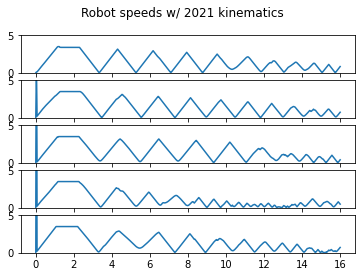

In [15]:
fig = plt.figure()

fig, axs = plt.subplots(num_robots, sharex=True, sharey=True)
fig.suptitle('Robot speeds w/ 2021 kinematics')

time = df[df['robot_id'] == 0]['time']
max_speed = df['speed'].max()
for robot_id, ax in enumerate(axs):
    ax.set_ylim([0, 5])
    robot = df[df['robot_id'] == robot_id]
    speed = robot['speed']
    ax.plot(time, speed)

# Save plot
fig.savefig('plot/vel_w_kinematics.jpg', dpi=200)